# Load the data

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import sklearn

In [2]:
# loading the data
patients = pd.read_csv('./training_data.csv')
dictionary = pd.read_csv('./data_dictionary.csv')

In [3]:
# To display plots directly in the notebook:
%matplotlib inline

In [4]:
patients.head()

,id,vdate,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,...,sodium,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,facid,lengthofstay
0,76513,2012-07-05,4,M,False,False,False,False,False,True,...,137.150067,148.420532,23.0,0.955051,28.450268,63,6.7,1,E,7
1,60406,2012-02-26,1,M,False,False,False,False,False,False,...,140.643655,166.718526,9.0,1.385747,29.233048,81,6.5,0,B,3
2,27322,2012-11-19,1,F,False,False,False,False,False,False,...,138.459305,106.468142,12.0,0.816984,34.295535,75,6.5,1,B,5
3,53699,2012-01-30,0,F,False,False,False,False,False,False,...,138.667613,144.311236,12.0,1.082725,31.207914,75,6.5,1,B,2
4,65412,2012-09-04,3,F,False,True,False,False,False,False,...,133.463292,199.728635,12.0,1.081557,30.475797,89,6.5,7,D,8


In [5]:
dictionary

,Index,Data fields,Type,Descriptions
0,NaN,LengthOfStay,NaN,NaN
1,1.0,eid,Integer,Unique Id of the hospital admission
2,2.0,vdate,String,Visit date
3,3.0,rcount,Integer,Number of readmissions within last 180 days
4,4.0,gender,String,Gender of the patient\nM or F
5,5.0,dialysisrenalendstage,String,Flag for renal disease during encounter
6,6.0,asthma,String,Flag for asthma during encounter
7,7.0,irondef,String,Flag for iron deficiency during encounter
8,8.0,pneum,String,Flag for pneumonia during encounter
9,9.0,substancedependence,String,Flag for substance dependence during encounter


In [6]:
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          70000 non-null  int64  
 1   vdate                       70000 non-null  object 
 2   rcount                      70000 non-null  int64  
 3   gender                      69647 non-null  object 
 4   dialysisrenalendstage       70000 non-null  bool   
 5   asthma                      70000 non-null  bool   
 6   irondef                     70000 non-null  bool   
 7   pneum                       70000 non-null  bool   
 8   substancedependence         70000 non-null  bool   
 9   psychologicaldisordermajor  70000 non-null  bool   
 10  depress                     70000 non-null  bool   
 11  psychother                  70000 non-null  bool   
 12  fibrosisandother            70000 non-null  bool   
 13  malnutrition                700

In [7]:
df = patients.copy()

# Explore the data

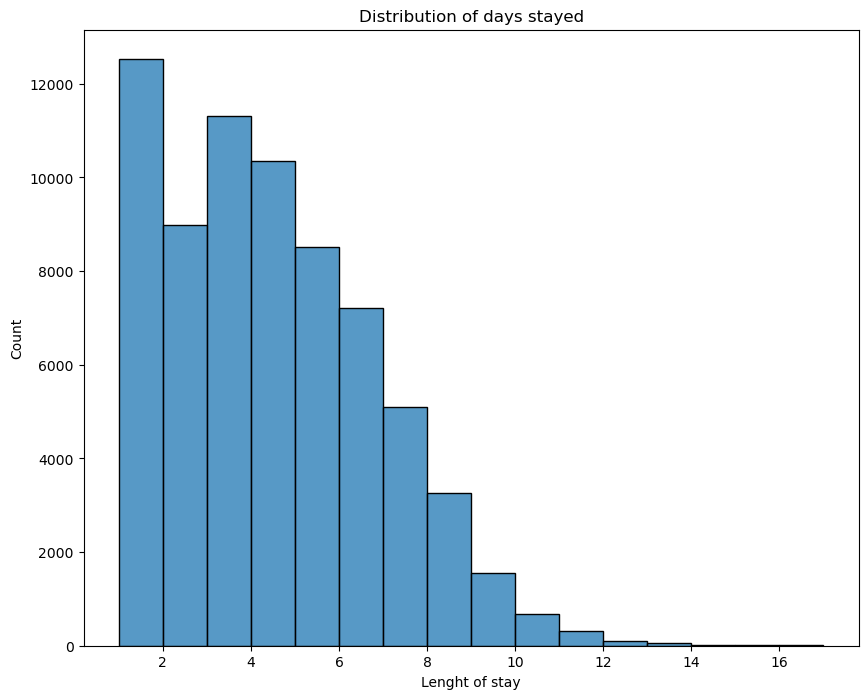

In [8]:
plt.figure(figsize=(10,8))
sns.histplot(df.lengthofstay, binwidth=1)
plt.xlabel('Lenght of stay')
plt.ylabel('Count')
plt.title('Distribution of days stayed')
plt.show()

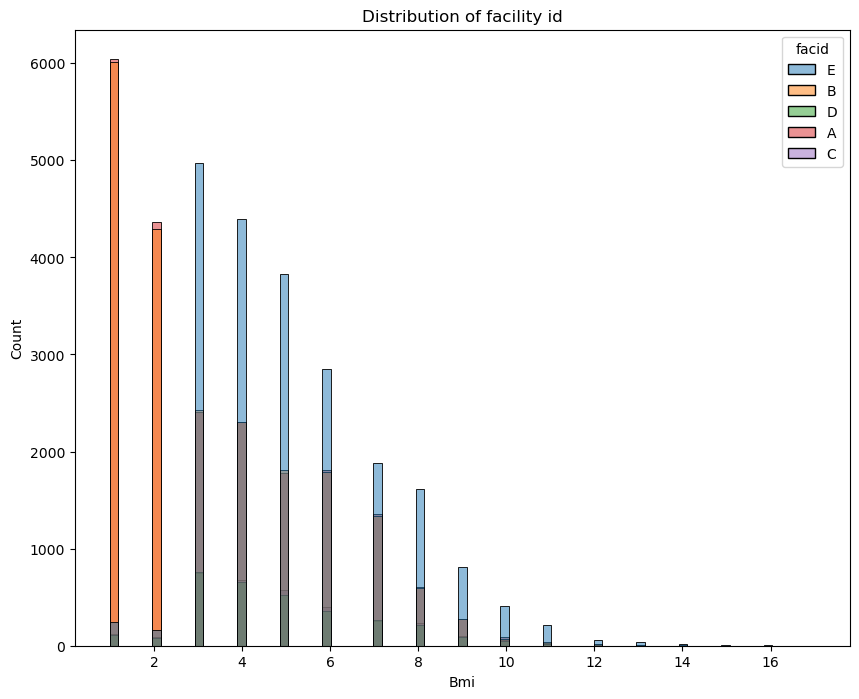

In [9]:
plt.figure(figsize=(10,8))
sns.histplot(data=df, x='lengthofstay', hue='facid')
plt.xlabel('Bmi')
plt.ylabel('Count')
plt.title('Distribution of facility id')
plt.show()

## Extra: further exploration using `pandas-profiling`

In [10]:
from ydata_profiling import ProfileReport

In [11]:
ProfileReport(df, minimal=True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Converting the features' data types

In [12]:
df.head()

,id,vdate,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,...,sodium,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,facid,lengthofstay
0,76513,2012-07-05,4,M,False,False,False,False,False,True,...,137.150067,148.420532,23.0,0.955051,28.450268,63,6.7,1,E,7
1,60406,2012-02-26,1,M,False,False,False,False,False,False,...,140.643655,166.718526,9.0,1.385747,29.233048,81,6.5,0,B,3
2,27322,2012-11-19,1,F,False,False,False,False,False,False,...,138.459305,106.468142,12.0,0.816984,34.295535,75,6.5,1,B,5
3,53699,2012-01-30,0,F,False,False,False,False,False,False,...,138.667613,144.311236,12.0,1.082725,31.207914,75,6.5,1,B,2
4,65412,2012-09-04,3,F,False,True,False,False,False,False,...,133.463292,199.728635,12.0,1.081557,30.475797,89,6.5,7,D,8


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          70000 non-null  int64  
 1   vdate                       70000 non-null  object 
 2   rcount                      70000 non-null  int64  
 3   gender                      69647 non-null  object 
 4   dialysisrenalendstage       70000 non-null  bool   
 5   asthma                      70000 non-null  bool   
 6   irondef                     70000 non-null  bool   
 7   pneum                       70000 non-null  bool   
 8   substancedependence         70000 non-null  bool   
 9   psychologicaldisordermajor  70000 non-null  bool   
 10  depress                     70000 non-null  bool   
 11  psychother                  70000 non-null  bool   
 12  fibrosisandother            70000 non-null  bool   
 13  malnutrition                700

Let's check out the different objects and see if we should convert them:

First, visit date. Let's only get the month here, and make it numerical.

In [14]:
df['vdate'].head()

0    2012-07-05
1    2012-02-26
2    2012-11-19
3    2012-01-30
4    2012-09-04
Name: vdate, dtype: object

In [15]:
df['vdate'] = pd.to_datetime(df['vdate']).dt.month

In [16]:
df['vdate'].head()

0     7
1     2
2    11
3     1
4     9
Name: vdate, dtype: int32

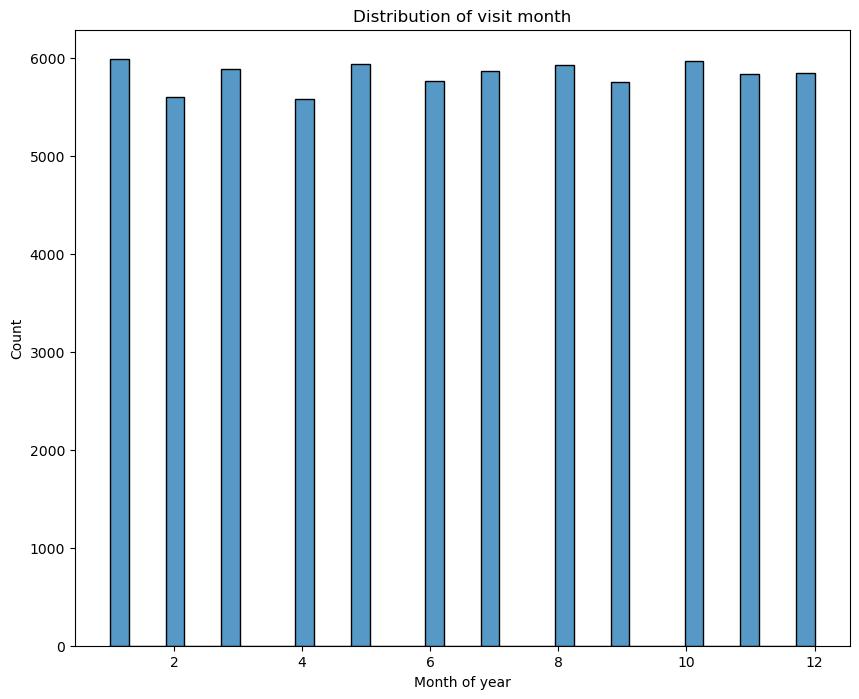

In [17]:
plt.figure(figsize=(10,8))
sns.histplot(data=df, x='vdate')
plt.xlabel('Month of year')
plt.ylabel('Count')
plt.title('Distribution of visit month')
plt.show()

Let's drop it because there is equally the same for every month.

In [18]:
df.drop('vdate', axis=1, inplace=True)

Let's also drop ID because it shouldn't make a difference.

In [19]:
df.drop('id', axis=1, inplace=True)

**Gender**: Let's replace all the NaN-genders to 'undefined'.

In [20]:
df['gender'].unique()

array(['M', 'F', nan], dtype=object)

In [21]:
df['gender'].replace({'M': 0, 'F':1, np.nan: 2}, regex=True, inplace=True)

In [22]:
df['gender'].unique()

array([0., 1., 2.])

**Hemo**: Let's make every value boolean

In [23]:
df['hemo'] = df['hemo'].astype(bool)

In [24]:
df['hemo'].unique()

array([False,  True])

In [25]:
df['hemo'].value_counts()

hemo
False    64389
True      5611
Name: count, dtype: int64

**Faculty ID**: Let's make the facility ID a one-hot array:

In [26]:
df['facid'].value_counts()

facid
E    21526
A    21085
B    20977
C     3286
D     3126
Name: count, dtype: int64

In [27]:
df['facid'].head()

0    E
1    B
2    B
3    B
4    D
Name: facid, dtype: object

We can use one_hot encoder when we categorize the facility-id

In [28]:
from sklearn.preprocessing import OneHotEncoder

In [29]:
one_hot = pd.get_dummies(df['facid'], prefix='facid')
df.drop('facid', axis=1, inplace=True)
df = pd.concat([df, one_hot], axis=1)

In [30]:
df.head()

,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,depress,psychother,...,bmi,pulse,respiration,secondarydiagnosisnonicd9,lengthofstay,facid_A,facid_B,facid_C,facid_D,facid_E
0,4,0.0,False,False,False,False,False,True,False,False,...,28.450268,63,6.7,1,7,False,False,False,False,True
1,1,0.0,False,False,False,False,False,False,False,False,...,29.233048,81,6.5,0,3,False,True,False,False,False
2,1,1.0,False,False,False,False,False,False,False,False,...,34.295535,75,6.5,1,5,False,True,False,False,False
3,0,1.0,False,False,False,False,False,False,False,False,...,31.207914,75,6.5,1,2,False,True,False,False,False
4,3,1.0,False,True,False,False,False,False,False,False,...,30.475797,89,6.5,7,8,False,False,False,True,False


In [31]:
df

,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,depress,psychother,...,bmi,pulse,respiration,secondarydiagnosisnonicd9,lengthofstay,facid_A,facid_B,facid_C,facid_D,facid_E
0,4,0.0,False,False,False,False,False,True,False,False,...,28.450268,63,6.7,1,7,False,False,False,False,True
1,1,0.0,False,False,False,False,False,False,False,False,...,29.233048,81,6.5,0,3,False,True,False,False,False
2,1,1.0,False,False,False,False,False,False,False,False,...,34.295535,75,6.5,1,5,False,True,False,False,False
3,0,1.0,False,False,False,False,False,False,False,False,...,31.207914,75,6.5,1,2,False,True,False,False,False
4,3,1.0,False,True,False,False,False,False,False,False,...,30.475797,89,6.5,7,8,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0.0,False,False,False,False,False,False,False,False,...,29.716528,72,6.5,0,1,False,True,False,False,False
69996,2,1.0,False,False,True,False,False,False,False,False,...,30.265735,78,6.3,1,5,False,False,True,False,False
69997,0,1.0,False,False,False,False,False,True,False,False,...,NaN,91,6.5,2,3,False,False,False,False,True
69998,0,1.0,False,False,False,False,True,False,False,False,...,30.261142,89,6.5,1,5,False,False,False,False,True


## Setting up our $f: X \to y$

In [32]:
X = df.drop('lengthofstay', axis=1)
y = df['lengthofstay']

In [33]:
X.head()

,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,depress,psychother,...,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,facid_A,facid_B,facid_C,facid_D,facid_E
0,4,0.0,False,False,False,False,False,True,False,False,...,0.955051,28.450268,63,6.7,1,False,False,False,False,True
1,1,0.0,False,False,False,False,False,False,False,False,...,1.385747,29.233048,81,6.5,0,False,True,False,False,False
2,1,1.0,False,False,False,False,False,False,False,False,...,0.816984,34.295535,75,6.5,1,False,True,False,False,False
3,0,1.0,False,False,False,False,False,False,False,False,...,1.082725,31.207914,75,6.5,1,False,True,False,False,False
4,3,1.0,False,True,False,False,False,False,False,False,...,1.081557,30.475797,89,6.5,7,False,False,False,True,False


# Create training and test sets

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [36]:
len(X_train), len(X_test)

(52500, 17500)

# Data preprocessing: Data cleaning, feature scaling and imputing missing data

In [37]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52500 entries, 58774 to 15795
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   rcount                      52500 non-null  int64  
 1   gender                      52500 non-null  float64
 2   dialysisrenalendstage       52500 non-null  bool   
 3   asthma                      52500 non-null  bool   
 4   irondef                     52500 non-null  bool   
 5   pneum                       52500 non-null  bool   
 6   substancedependence         52500 non-null  bool   
 7   psychologicaldisordermajor  52500 non-null  bool   
 8   depress                     52500 non-null  bool   
 9   psychother                  52500 non-null  bool   
 10  fibrosisandother            52500 non-null  bool   
 11  malnutrition                52500 non-null  bool   
 12  hemo                        52500 non-null  bool   
 13  hematocrit                  5250

Let's impute the bmi:

In [38]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy='mean')

In [39]:
X_train['bmi'] = imp.fit_transform(X_train['bmi'].to_numpy().reshape(-1,1))

In [40]:
X_test['bmi'] = imp.transform(X_test['bmi'].to_numpy().reshape(-1,1))

In [41]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train['bmi'] = imp.fit_transform(X_train['bmi'].to_numpy().reshape(-1,1))
X_test['bmi'] = imp.transform(X_test['bmi'].to_numpy().reshape(-1,1))

# Training a regression model

In [42]:
from sklearn.ensemble import RandomForestRegressor

In [43]:
rf_reg = RandomForestRegressor(random_state=42)

In [44]:
rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [45]:
y_pred = rf_reg.predict(X_test)

Let's display the real data vs. some of the predictions 

In [46]:
list(zip(y_test, y_pred))[:20] # "Zip" the two above arrays and display the first 10

[(1, 1.0),
 (1, 1.0),
 (1, 1.0),
 (1, 1.9),
 (1, 1.0),
 (1, 2.51),
 (2, 2.07),
 (2, 1.94),
 (6, 5.37),
 (5, 5.0),
 (5, 4.6),
 (1, 1.0),
 (3, 3.0),
 (6, 6.35),
 (4, 2.89),
 (4, 2.81),
 (7, 7.12),
 (5, 3.9),
 (5, 5.18),
 (7, 5.1)]

Let's make a scatter plot to compare the length of stays vs. the predicted length of stays

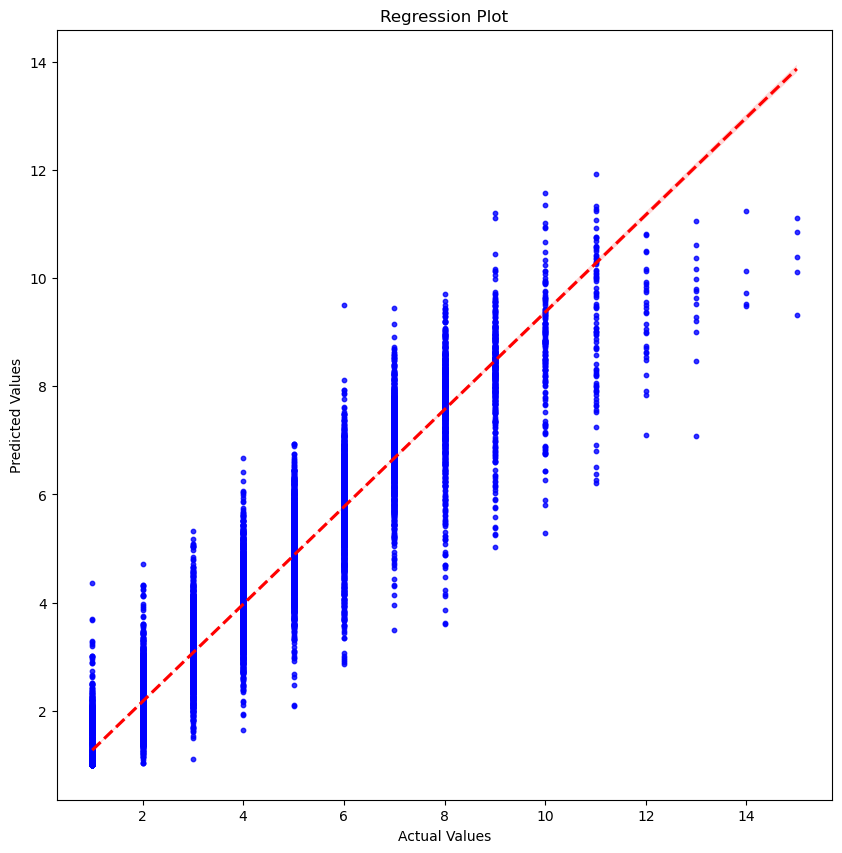

In [47]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'color': 'blue', 's': 10}, line_kws={'color': 'red', 'linestyle': '--'})
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')
ax.set_title('Regression Plot')
plt.show()

# Evaluating models / performance measures

In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [49]:
# MAE
mean_absolute_error(y_test, y_pred)

0.41190628571428567

In [50]:
# MSE
mean_squared_error(y_test, y_pred, squared=True)

0.44808128

In [51]:
# RMSE
mean_squared_error(y_test, y_pred, squared=False)

0.669388736086887

In [52]:
# R2
r2_score(y_test, y_pred)

0.9201758112954019

## Other models

### Logistic regression

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
lr = LinearRegression()
lr.fit(X_train, y_train) 

LinearRegression()

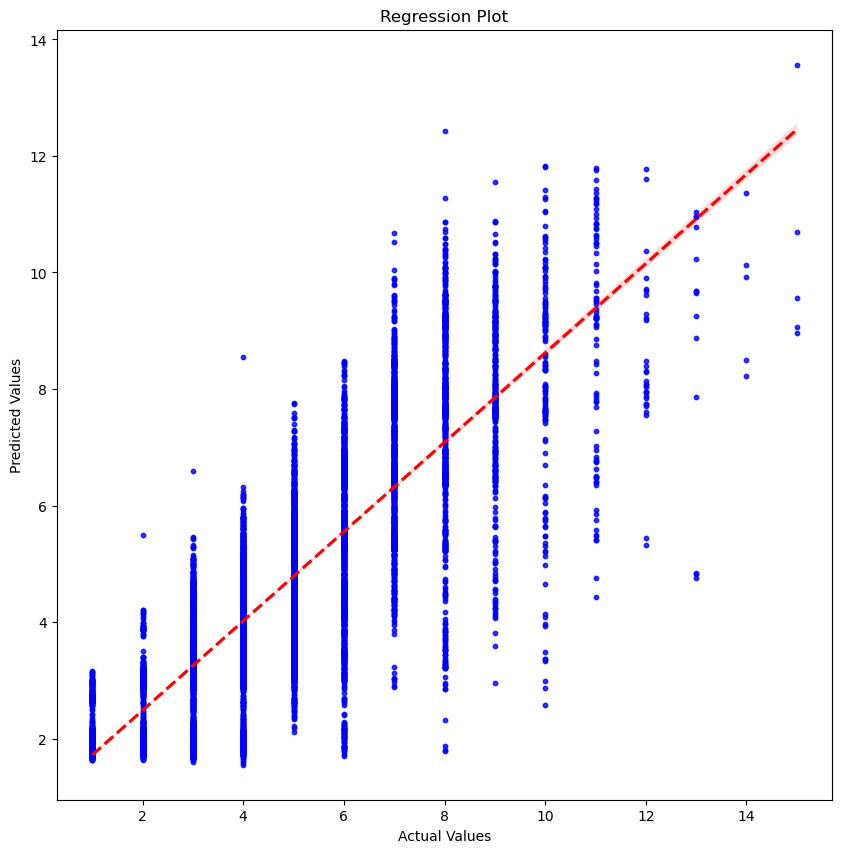

In [55]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.regplot(x=y_test, y=lr.predict(X_test), scatter_kws={'color': 'blue', 's': 10}, line_kws={'color': 'red', 'linestyle': '--'})
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')
ax.set_title('Regression Plot')
plt.show()

In [56]:
# MAE
mean_absolute_error(y_test, lr.predict(X_test))

0.871926981692775

In [57]:
# MSE
mean_squared_error(y_test, lr.predict(X_test), squared=True)

1.3016772751389971

In [58]:
# RMSE
mean_squared_error(y_test, lr.predict(X_test), squared=False)

1.1409107218091157

In [59]:
# R2
r2_score(y_test, lr.predict(X_test))

0.7681105257439402

### ElasticNet

In [60]:
from sklearn.linear_model import ElasticNet

In [61]:
en = ElasticNet()
en.fit(X_train, y_train)

ElasticNet()

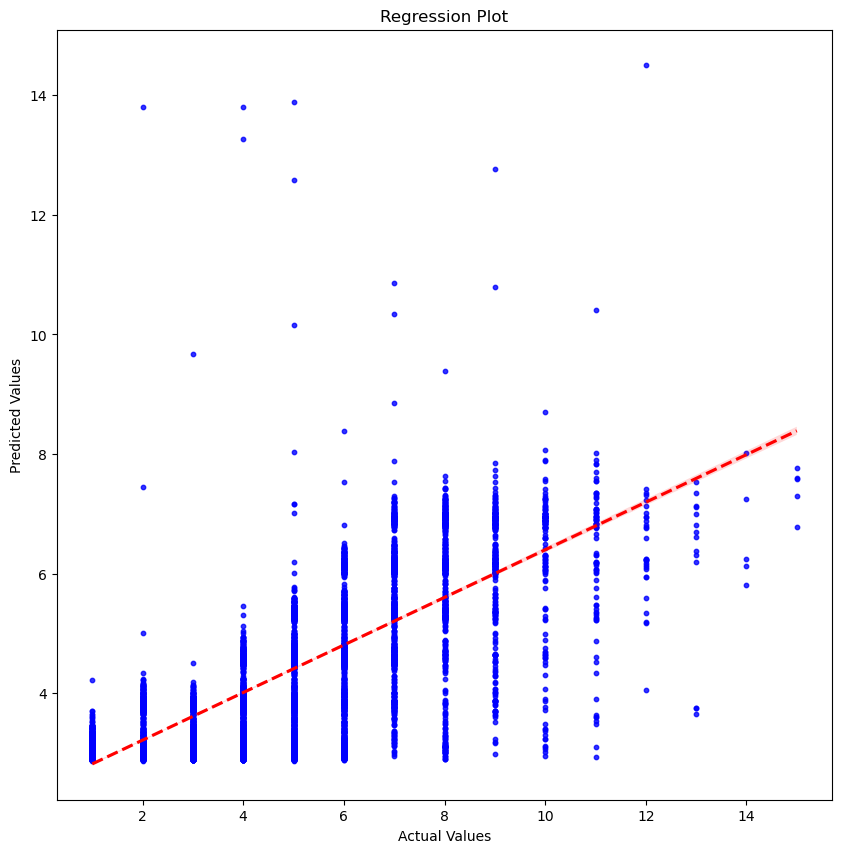

In [62]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.regplot(x=y_test, y=en.predict(X_test), scatter_kws={'color': 'blue', 's': 10}, line_kws={'color': 'red', 'linestyle': '--'})
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')
ax.set_title('Regression Plot')
plt.show()

In [63]:
# MAE
mean_absolute_error(y_test, en.predict(X_test))

1.2695681683922038

In [64]:
# MSE
mean_squared_error(y_test, en.predict(X_test), squared=True)

2.660256219568575

In [65]:
# RMSE
mean_squared_error(y_test, en.predict(X_test), squared=False)

1.6310291902870944

In [66]:
# R2
r2_score(y_test, en.predict(X_test))

0.5260842084868562

### Gradient Boosting

In [67]:
from sklearn.ensemble import GradientBoostingRegressor

In [68]:
gb = GradientBoostingRegressor(n_estimators=500, max_depth=4, learning_rate=0.2)
gb.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.2, max_depth=4, n_estimators=500)

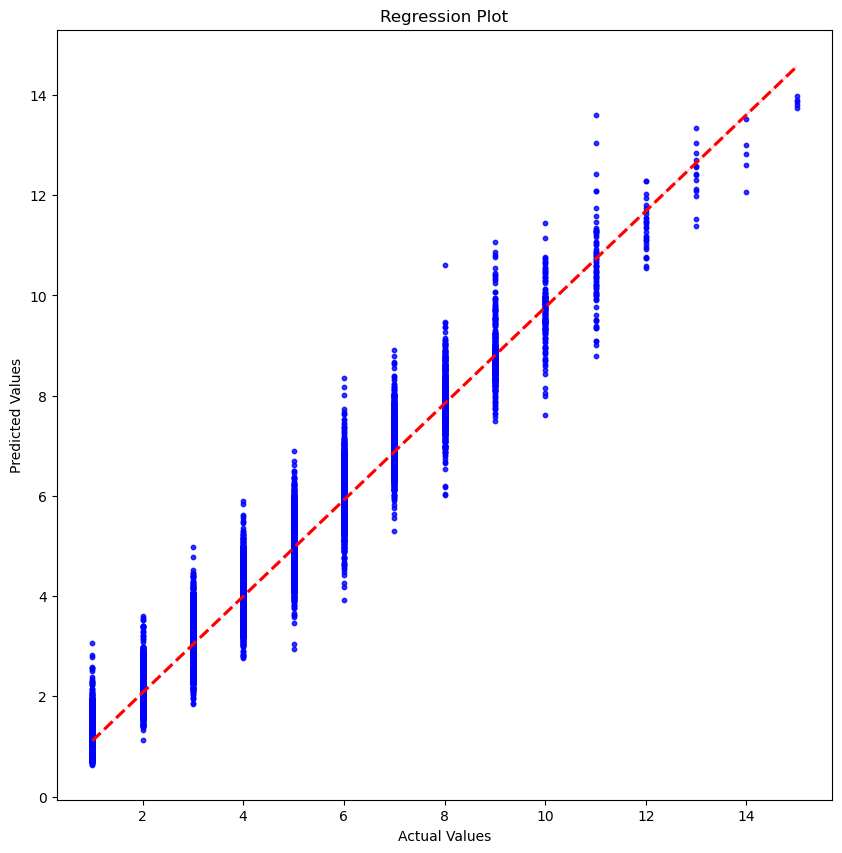

In [69]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.regplot(x=y_test, y=gb.predict(X_test), scatter_kws={'color': 'blue', 's': 10}, line_kws={'color': 'red', 'linestyle': '--'})
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')
ax.set_title('Regression Plot')
plt.show()

In [70]:
# MAE
mean_absolute_error(y_test, gb.predict(X_test))

0.33352956351018387

In [71]:
# MSE
mean_squared_error(y_test, gb.predict(X_test), squared=True)

0.1897626013619911

In [72]:
# RMSE
mean_squared_error(y_test, gb.predict(X_test), squared=False)

0.43561749432499963

In [73]:
# R2
r2_score(y_test, gb.predict(X_test))

0.9661944241451127

## Gradient Boost

In [74]:
#import xgboost as xgb

## Comparing the models

In [75]:
def r2(y, yhat):
    """
    Computes the R-squared value between the two 
    vectors y and yhat (that are of equal length)
    """
    y_mean = np.mean(y)
    ss_res = np.sum((y - yhat)**2)
    ss_tot = np.sum((y - y_mean)**2)
    r2 = 1 - ss_res/ss_tot
    
    return r2

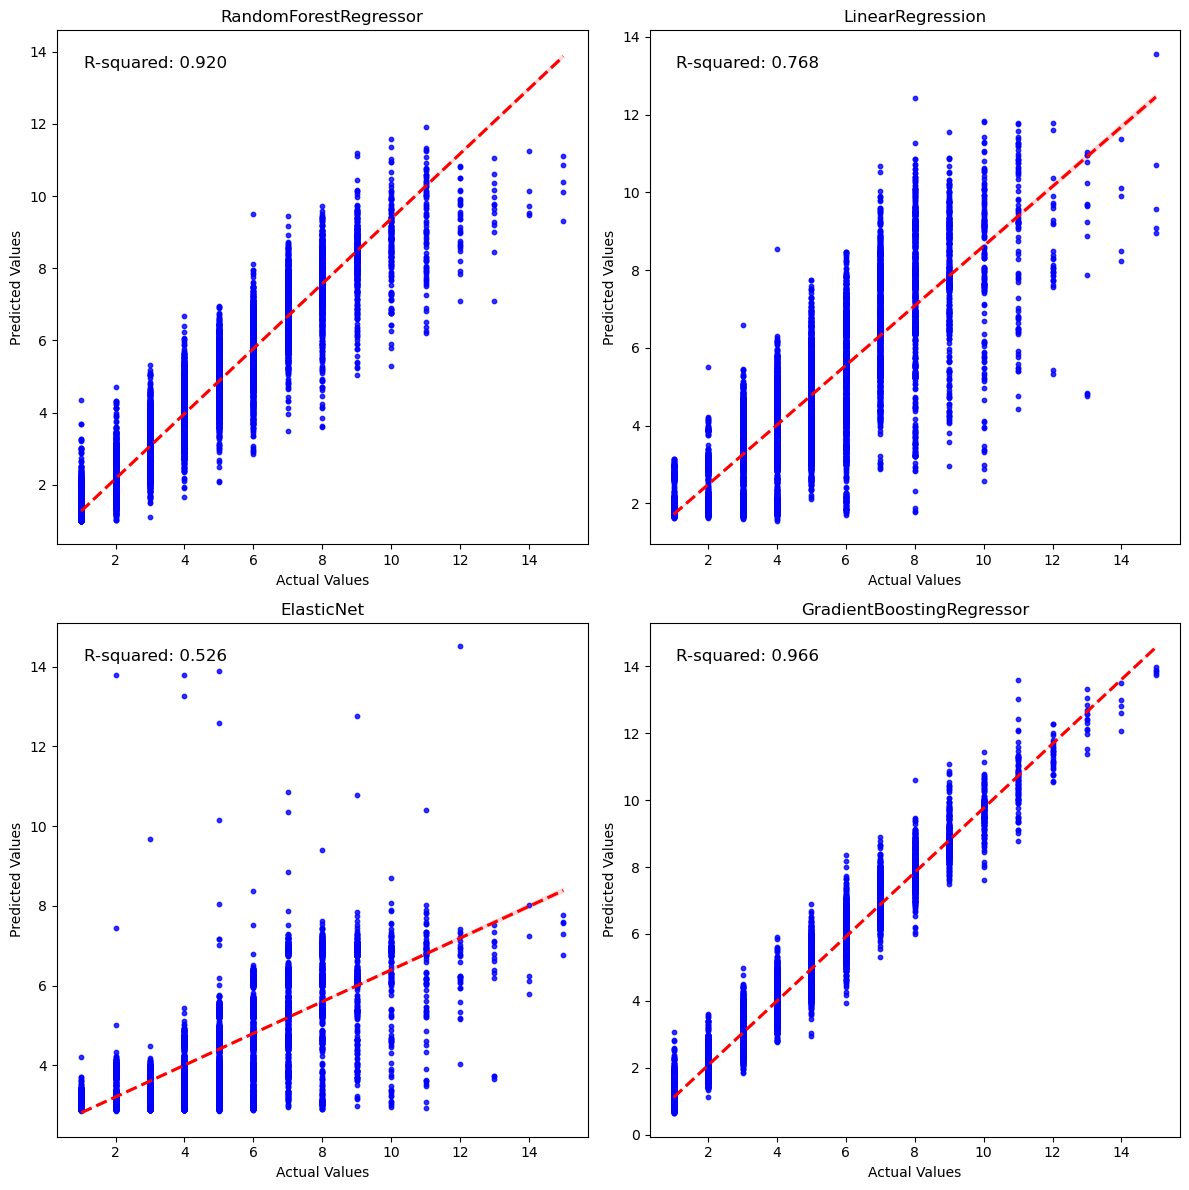

In [76]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

for model, ax in zip([rf_reg, lr, en, gb], axes.flatten()):
    y_pred = model.predict(X_test)
    sns.regplot(x=y_test, y=y_pred, ax=ax, scatter_kws={'color': 'blue', 's': 10}, line_kws={'color': 'red', 'linestyle': '--'})
    ax.set_xlabel('Actual Values')
    ax.set_ylabel('Predicted Values')
    ax.set_title(type(model).__name__)
    r2_score = r2(y_test, y_pred)
    ax.text(0.05, 0.95, f'R-squared: {r2_score:.3f}', transform=ax.transAxes, fontsize=12, verticalalignment='top')

plt.tight_layout()
plt.show()

## Testing on test set and exporting score for submission

In [77]:
test_set = pd.read_csv('./test_data.csv')

In [78]:
test_df = test_set.copy()

Remove all values that isn't 0 or 1

In [79]:
test_df['hemo'].value_counts()

hemo
0.00000    27516
1.00000     2456
0.07921       28
Name: count, dtype: int64

In [80]:
test_df['hemo'] = (test_df['hemo'] == 1)

In [81]:
test_df['hemo'].value_counts()

hemo
False    27544
True      2456
Name: count, dtype: int64

Make sure facid is correctly encoded

In [82]:
test_df['facid'].value_counts()

facid
4.0    9229
1.0    9035
0.0    8950
2.0    1413
3.0    1373
Name: count, dtype: int64

In [83]:
encoder = OneHotEncoder(sparse_output=False) #return as nparray instead of sparse_matrix
facid_cat = test_df[['facid']]
facid_cat_encoded = encoder.fit_transform(facid_cat)
facid_cat_encoded

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.]])

In [84]:
test_df['facid'] = facid_cat_encoded

In [85]:
test_df[['facid']].value_counts()

facid
0.0      21050
1.0       8950
Name: count, dtype: int64

In [86]:
predictions = gb.predict(test_df.drop('id', axis=1))
        
# create a new DataFrame with 'id' and 'lengthofstay' columns
output = pd.DataFrame({'id': test_set['id'], 'lengthofstay': predictions})

# ensure 'id' is int and 'lengthofstay' is float
output['id'] = output['id'].astype(int)
output['lengthofstay'] = output['lengthofstay'].astype(float)

# save to a new CSV file
output.to_csv('submission1.csv', index=False)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- facid
Feature names seen at fit time, yet now missing:
- facid_A
- facid_B
- facid_C
- facid_D
- facid_E


## Determining and optimizing model

Because of the r2 score we will use the gradient booster model as our machine learning model. The next step will be to visualize and make our model a little bit more approachable through a web-interface. But before we do that, let's try to analyze which features bears the most importance for the model

In [ ]:
feature_importances = gb.feature_importances_

Map feature importances to the corresponding feature names

In [ ]:
features = list(patients.drop(['lengthofstay', 'id', 'vdate'], axis=1).columns)
feature_importance_dict = dict(zip(features, feature_importances))

Sort the features based on importance

In [ ]:
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

Plot feature importances

In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot(x=[x[1] for x in sorted_features], y=[x[0] for x in sorted_features])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

#### Reading the importances

As we can see from the plot, gender basically has no importance as to how long a patient will stay at the hospital. Readmissions, on the other hand, is massively important when it comes to determining how long a patient will stay at the hospital.

## Making a web interface

The reason we check the importance is to define which features we need to ask for when making the interface. 

First let's make a function that the web interface can use

In [ ]:
import gradio as gr

def predictstay(patientinfo):
    patientinfo = patientinfo.split(',')
    return gb.predict([patientinfo])
    
#You need to answer in the text box with every value separated with commas.
demo = gr.Interface(fn=predictstay, inputs="text", outputs="text")
    
demo.launch()  